In [1]:
# %pip install opencv-python numpy mataplotlib cvlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox


c:\Users\SHIVAM SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\cvlib\face_detection.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename, Requirement



0: 480x640 14 cars, 3 trucks, 89.5ms
Speed: 2.4ms preprocess, 89.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
C:\Users\SHIVAM SHARMA\AppData\Local\Temp\ipykernel_9908\3235511450.py:11: SyntaxWarning: invalid escape sequence '\o'
  image_path = 'D:\object_detection\image\cars.webp'


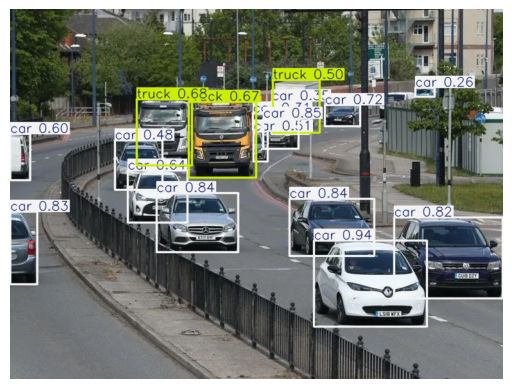

Cars detected: 14
Trucks detected: 3
Total vehicles detected: 17


In [3]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from collections import Counter

# Load YOLOv8 model (pretrained on COCO dataset)

model = YOLO("yolov8n.pt")  # use 'yolov8s.pt' or bigger for higher accuracy

# Load image
image_path = 'D:\object_detection\image\cars.webp'
image = cv2.imread(image_path)

# Run detection
results = model(image)

# Draw bounding boxes
annotated = results[0].plot()

# Show image with detections
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Vehicle classes we care about
vehicle_classes = {"car", "truck", "bus", "motorbike"}

# Collect detected labels
detected_labels = [
    model.names[int(cls_id)] for cls_id in results[0].boxes.cls
    if model.names[int(cls_id)] in vehicle_classes
]

# Count each type
counts = Counter(detected_labels)

# Print breakdown
for vehicle, count in counts.items():
    print(f"{vehicle.capitalize()}s detected:", count)

# Print total
print("Total vehicles detected:", sum(counts.values()))
